In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [31]:
path = '../data_files/data/ex3data1.mat' 
data = loadmat(path)

In [32]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [33]:
def load_data(path):
    data = loadmat(path)
    X = data['X']
    y = data['y']
    return X,y

In [34]:
X, y = load_data('ex3/ex3data1.mat')
X.shape,y.shape,np.unique(y)

((5000, 400),
 (5000, 1),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8))

In [35]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

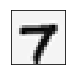

this should be [7]


In [36]:
def plot_an_image(X):
    '''
    随机打印一个数字
    '''
    pick_one = np.random.randint(0,5000)
    image = X[pick_one,:]
    fig,ax = plt.subplots(figsize=(1,1))
    ax.matshow(image.reshape((20,20)).T, cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    print('this should be {}'.format(y[pick_one]))

plot_an_image(X)

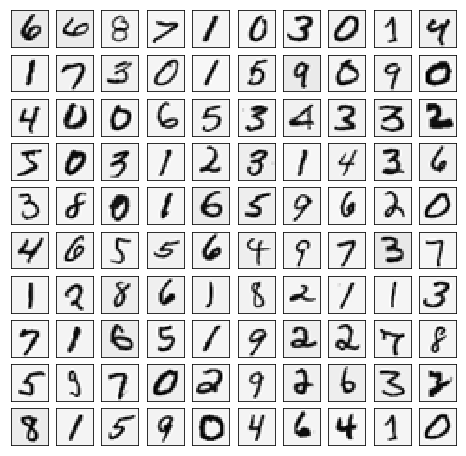

In [37]:
def plot_100_image(X):
    '''
    随机打印100个数字
    '''
    sample_idx = np.random.choice(np.arange(X.shape[0]),100)
    sample_images = X[sample_idx, :] # (100,400)
    
    fig,ax_array = plt.subplots(nrows = 10,ncols= 10,sharey = True, sharex = True, figsize=(8,8))
    
    for row in range(10):
        for column in range(10):
            plt.imshow(sample_images[10*row+column].reshape((20,20)).T)
            ax_array[row, column].matshow(sample_images[10*row+column].reshape((20,20)).T,cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.show()
plot_100_image(X)

In [38]:
def randomly_select(images, numbers):
    """
    从images中选择numbers张图片
    
    parameters:
    ----------
    images : ndarray
            多干张图片
    numbers : int
            随机选择的图片数量
    """
    m = images.shape[0]
    n = images.shape[1]
    flags = np.zeros((m,), bool)
    res = False
    for i in range(numbers):
        index = np.random.randint(0, m - 1)
        while flags[index]:
            index = random.randint(0, m)
        if type(res) == bool:
            res = images[index].reshape(1, n)
        else:
            res = np.concatenate((res, images[index].reshape(1, n)), axis=0)
    return res

def mapping(images, images_dimension):
    """
    将若干张图片，组成一张图片

    parameters:
    ----------
    images : ndarray
            多干张图片
    images_dimension : int
            新的正方形大图片中一边上有多少张图片
    """
    image_dimension = int(np.sqrt(images.shape[-1]))
    image = False
    im = False
    for i in images:
        if type(image) == bool:
            image = i.reshape(image_dimension, image_dimension)
        else:
            if image.shape[-1] == image_dimension * images_dimension:
                if type(im) == bool:
                    im = image
                else:
                    im = np.concatenate((im, image), axis=0)
                image = i.reshape(image_dimension, image_dimension)
            else:
                image = np.concatenate((image, i.reshape(image_dimension, image_dimension)), axis=1)
    return np.concatenate((im, image), axis=0)


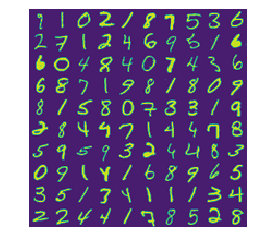

In [39]:
im = mapping(randomly_select(X, 100), 10)
plt.imshow(im.T)  # 图片是镜像的需要转置让它看起来更更正常
plt.axis('off')
plt.show()

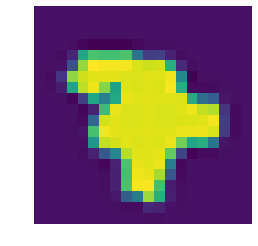

In [40]:
n = np.random.randint(0,5000)
image = X[n,:]
image = image.reshape((20,20))
plt.axis('off')
plt.imshow(image.T)

In [41]:
def regularized_cost(theta, X, y, l):
    thetaReg = theta[1:]
    first = -y * np.log(sigmoid(X @ theta))
    second = -(1 - y) * np.log(1 - sigmoid(X @ theta))
    reg = (thetaReg@thetaReg)*l / (2*len(X))
    return np.mean(first+second) + reg

In [42]:
def regularized_gradient(theta, X, y, l):
    thetaReg = theta[1:]
    first = (1 / len(X)) * X.T @ (sigmoid(X @ theta) - y)
    reg = np.concatenate([np.array([0]), (l / len(X)) * l *thetaReg])
    return first + reg

In [43]:
from scipy.optimize import minimize
def one_vs_all( X, y, l, K):
    all_theta = np.zeros((K, X.shape[1]))
    for i in range(1,K+1):
        theta = np.zeros(X.shape[1])
        y_i = np.array([1 if label == i else 0 for label in y])
        ret = minimize(fun=regularized_cost, x0=theta, args=(X, y_i, l), method='TNC',
                       jac=regularized_gradient, options={'disp': True})
        all_theta[i-1,:] = ret.x
        
    return all_theta

In [44]:
def predict_all(X, all_theta):
    h = sigmoid(X @ all_theta.T)
    h_argmax = np.argmax(h,axis=1)
    h_argmax += 1
#     print(h.shape)
    return h_argmax

In [45]:
raw_X, raw_y = load_data(path)
X = np.insert(raw_X, 0 ,1,axis=1)
y = raw_y.flatten()

all_theta = one_vs_all(X, y, 1, 10)
all_theta

array([[-2.38299535e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.30403473e-03, -6.61046834e-10,  0.00000000e+00],
       [-3.18287716e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.44785394e-03, -5.07096090e-04,  0.00000000e+00],
       [-4.80099131e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.87340850e-05, -2.46227376e-07,  0.00000000e+00],
       ...,
       [-7.98810401e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -8.95110562e-05,  7.21802891e-06,  0.00000000e+00],
       [-4.57373512e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.33624688e-03,  9.99568819e-05,  0.00000000e+00],
       [-5.40174011e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.16425501e-04,  7.86672578e-06,  0.00000000e+00]])

In [46]:
y_pred = predict_all(X, all_theta)
# print(y_pred.shape)
accuracy = np.mean(y_pred == y)
print ('accuracy = {0}%'.format(accuracy * 100))

accuracy = 94.46%


In [47]:
from sklearn.metrics import classification_report
report=classification_report(y_pred,y)
print(report)

              precision    recall  f1-score   support

           1       0.99      0.95      0.97       517
           2       0.92      0.95      0.93       485
           3       0.91      0.95      0.93       480
           4       0.95      0.95      0.95       504
           5       0.92      0.92      0.92       499
           6       0.98      0.97      0.97       505
           7       0.95      0.95      0.95       500
           8       0.92      0.93      0.92       497
           9       0.92      0.92      0.92       503
          10       0.99      0.97      0.98       510

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.95      0.94      0.94      5000



In [48]:
X, y = load_data(path)

In [49]:
def load_weights(path):
    data = loadmat(path)
    return data['Theta1'],data['Theta2']

In [50]:
theta1,theta2 = load_weights('../data_files/data/ex3weights.mat')

In [51]:
theta1.shape,theta2.shape

((25, 401), (10, 26))

In [52]:
y = y.flatten()
X = np.insert(X, 0, values=np.ones(X.shape[0]), axis=1)

In [53]:
a1 = X
z2 = a1 @ theta1.T
z2.shape

(5000, 25)

In [54]:
z2 = np.insert(z2,0,1,axis=1)
a2 = sigmoid(z2)

In [55]:
z3 = a2 @ theta2.T
z3.shape

(5000, 10)

In [56]:
a3 = sigmoid(z3)
a3.shape

(5000, 10)

In [57]:
y_pred = np.argmax(a3,axis=1) + 1
report = classification_report(y_pred,y)
print(report)
accuracy = np.mean(y_pred == y)
print ('accuracy = {0}%'.format(accuracy * 100))

              precision    recall  f1-score   support

           1       0.98      0.97      0.97       508
           2       0.97      0.98      0.97       493
           3       0.96      0.98      0.97       491
           4       0.97      0.97      0.97       499
           5       0.98      0.98      0.98       503
           6       0.99      0.97      0.98       507
           7       0.97      0.98      0.97       495
           8       0.98      0.98      0.98       502
           9       0.96      0.97      0.96       497
          10       0.99      0.98      0.99       505

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000

accuracy = 97.52%
